/var/folders/9w/41mr3_091kg_m7h50hbth01w0000gn/T/ipykernel_18381/1476994006.py:27: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=axes1)
/var/folders/9w/41mr3_091kg_m7h50hbth01w0000gn/T/ipykernel_18381/1476994006.py:57: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


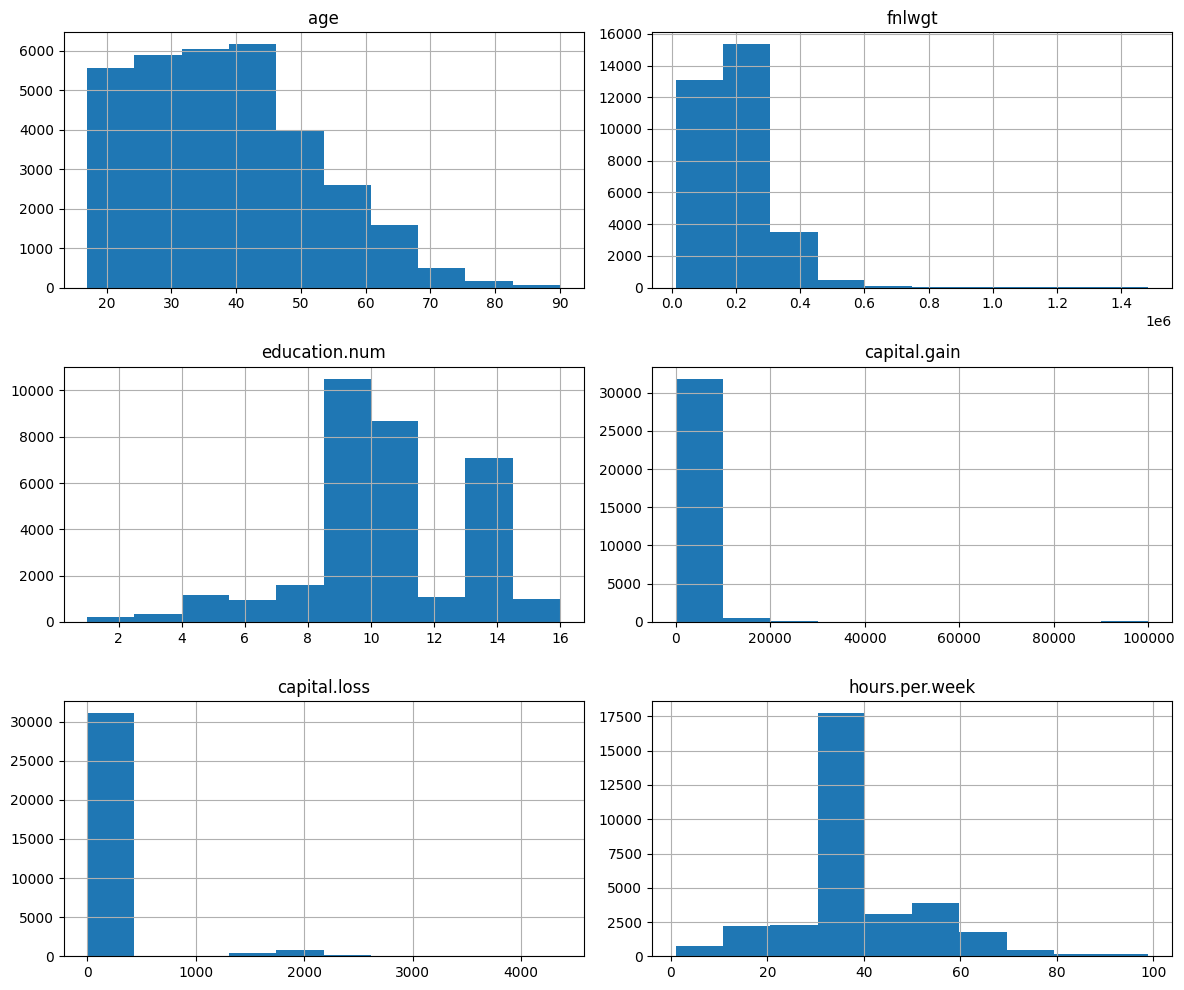

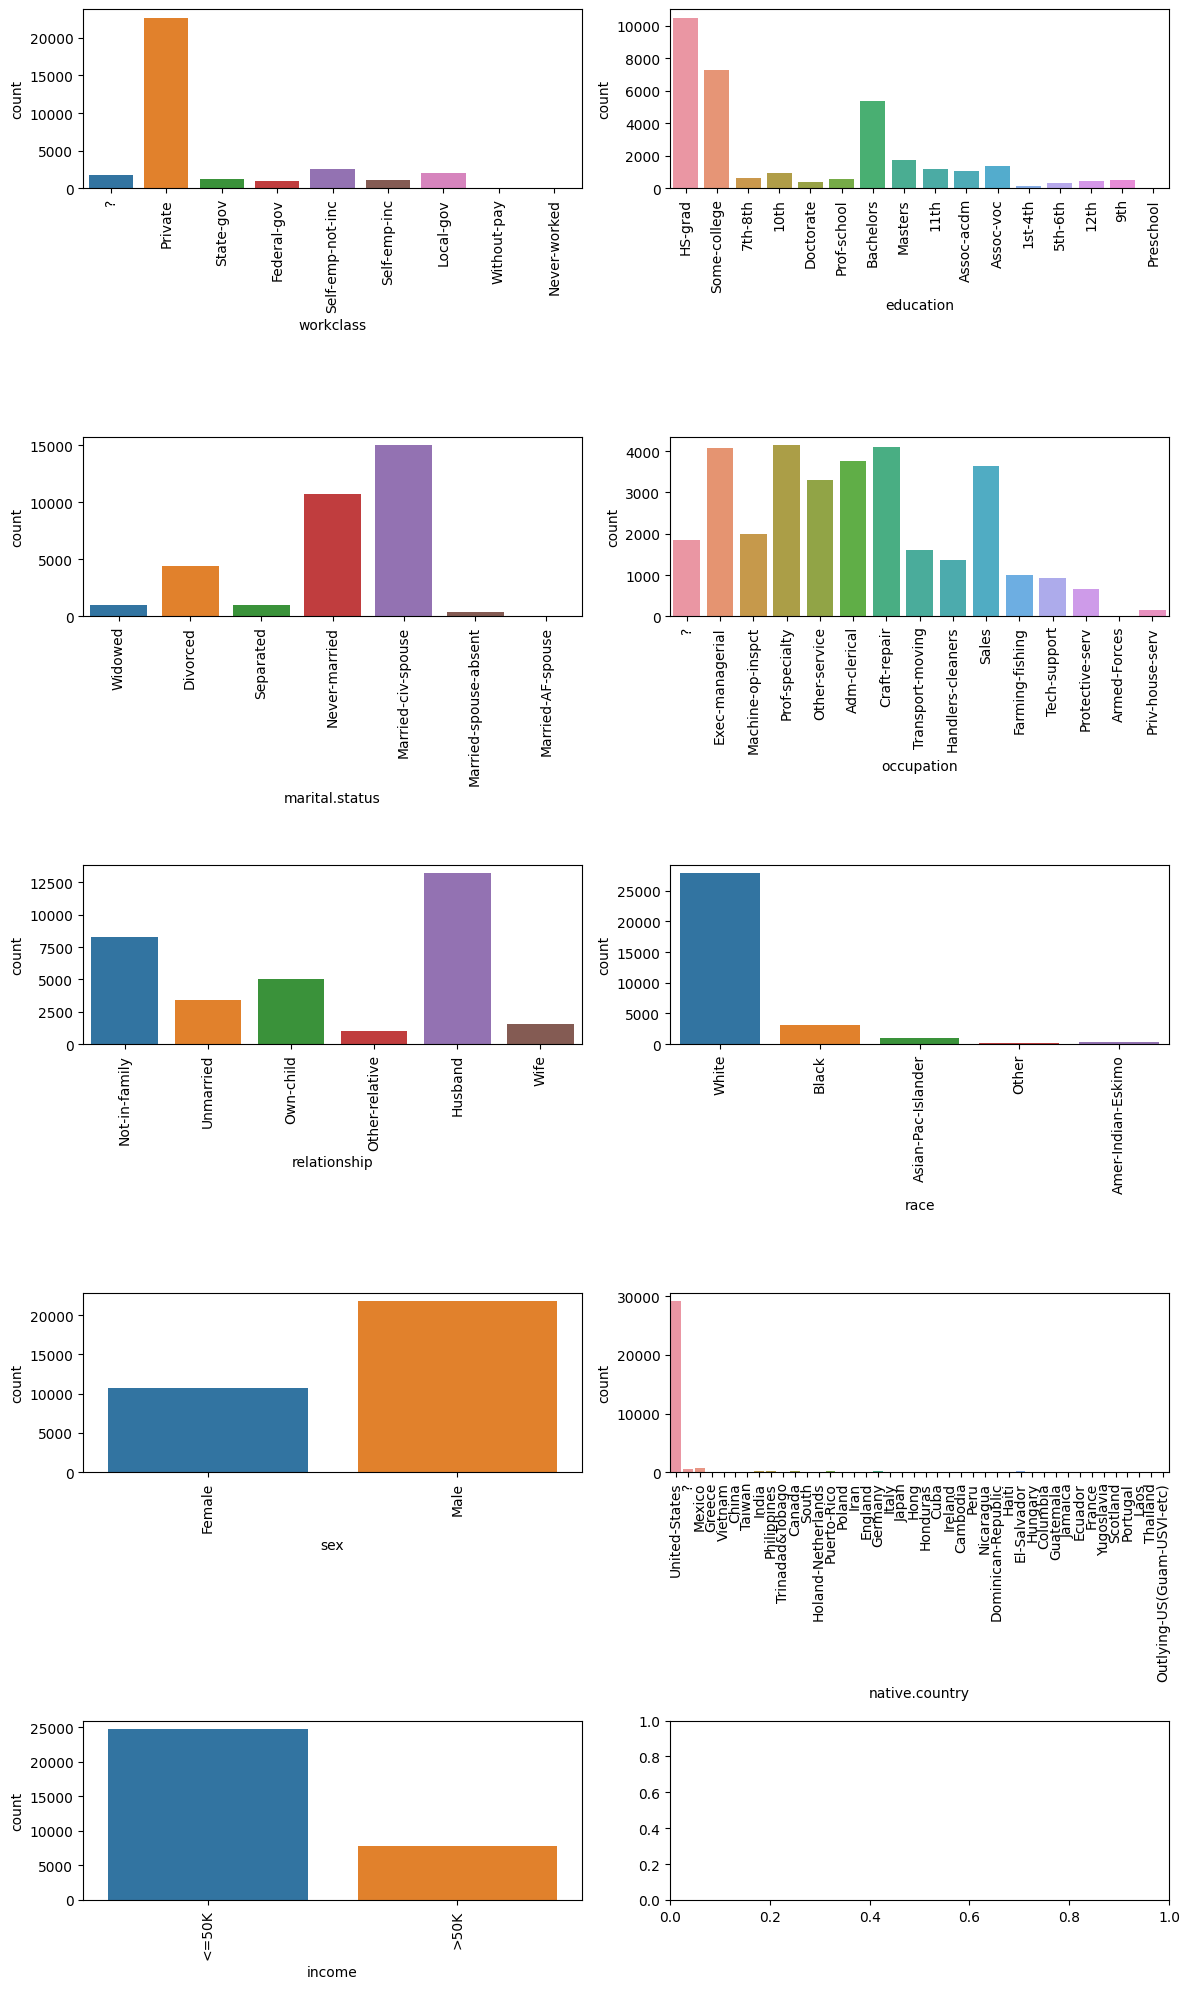

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rpart.dataset import load_census

# Load dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status',
                'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
                'hours.per.week', 'native.country', 'income']

df = load_census()

# Uncomment for info, summary statistics, and value counts
# # Display general information
# print(df.info())

# # Display summary statistics for numerical columns
# print(df.describe())

# Display counts for categorical columns
# for col in df.select_dtypes(include='object').columns:
#     print(f'\n{col} Value Counts:')
#     print(df[col].value_counts())

# Visualize histograms for numerical columns
fig1, axes1 = plt.subplots(figsize=(12, 10))
df.hist(ax=axes1)
plt.tight_layout()
plt.savefig('figs/histograms.png')
# plt.show()

# Visualize bar plots for categorical columns
categorical_columns = df.select_dtypes(include='object').columns
n_plots = len(categorical_columns)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols

fig2, axes2 = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 4))
for i, col in enumerate(categorical_columns):
    row, col_idx = i // n_cols, i % n_cols
    sns.countplot(x=col, data=df, ax=axes2[row, col_idx])
    axes2[row, col_idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('figs/bar_plots.png')
# plt.show()

for i, col in enumerate(categorical_columns):
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.countplot(x=col, data=df, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.savefig(f'figs/{col}_bar_plot.png')
    plt.close()

# Visualize correlations
corr = df.corr()
fig3, axes3 = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes3)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('figs/correlation.png')
plt.close()


In [11]:

# Binning the 'education' column
education_mapping = {
    'Preschool': 'Primary',
    '1st-4th': 'Primary',
    '5th-6th': 'Primary',
    '7th-8th': 'Primary',
    '9th': 'Secondary',
    '10th': 'Secondary',
    '11th': 'Secondary',
    '12th': 'Secondary',
    'HS-grad': 'Secondary',
    'Some-college': 'College',
    'Assoc-acdm': 'College',
    'Assoc-voc': 'College',
    'Bachelors': 'College',
    'Masters': 'Post-Graduate',
    'Doctorate': 'Post-Graduate',
    'Prof-school': 'Post-Graduate',
}

df['education.new'] = df['education'].map(education_mapping)

# strip native.country of whitespaces
df['native.country'] = df['native.country'].str.strip()
# Binning the 'native.country' column
def bin_country(country):
    if country in ['United-States', 'Canada']:
        return country
    elif country in ['Mexico', 'Puerto-Rico', 'Cuba', 'El-Salvador',
                     'Guatemala', 'Honduras', 'Nicaragua', 'Dominican-Republic',
                     'Jamaica', 'Haiti', 'Trinadad&Tobago']:
        return 'Central & South America & Caribbean'
    elif country in ['Outlying-US(Guam-USVI-etc)']:
        return 'US Outlying'
    elif country in ['England', 'Germany', 'Italy', 'France', 'Ireland',
                     'Scotland', 'Greece', 'Portugal', 'Hungary', 'Poland', 'Yugoslavia']:
        return 'Europe'
    elif country in ['Philippines', 'Vietnam', 'China', 'India', 'Japan', 'Taiwan',
                     'Hong', 'Thailand', 'Cambodia', 'Laos']:
        return 'Asia'
    elif country in ['South', 'Iran']:
        return 'Middle East'
    else:
        return 'Other'

df['native.country.new'] = df['native.country'].apply(bin_country)

print(df['education.new'].value_counts())
print(df['native.country.new'].value_counts())


College          15095
Secondary        13556
Post-Graduate     2712
Primary           1198
Name: education.new, dtype: int64
United-States    29170
Other             3270
Canada             121
Name: native.country.new, dtype: int64


In [12]:
df['native.country'].value_counts()

United-States                          29170
Central & South America & Caribbean     1283
Other                                    702
Asia                                     628
Europe                                   520
Middle East                              123
Canada                                   121
US Outlying                               14
Name: native.country, dtype: int64

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rpart.dataset import load_census

# Load dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status',
                'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
                'hours.per.week', 'native.country', 'income']

df = load_census()

# Display general information
print(df.info())

# Display summary statistics for numerical columns
print(df.describe())

# Display counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f'\n{col} Value Counts:')
    print(df[col].value_counts())

# Visualize histograms for numerical columns
fig1, axes1 = plt.subplots(figsize=(12, 6))
df.hist(ax=axes1)
plt.tight_layout()
plt.savefig('histograms.png')
plt.close()

# Visualize bar plots for categorical columns
categorical_columns = df.select_dtypes(include='object').columns
n_plots = len(categorical_columns)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols

for i, col in enumerate(categorical_columns):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.countplot(x=col, data=df, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.savefig(f'{col}_bar_plot.png')
    plt.close()

# Visualize correlations
corr = df.corr()
fig3, axes3 = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes3)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation.png')
plt.close()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  3

/var/folders/9w/41mr3_091kg_m7h50hbth01w0000gn/T/ipykernel_18381/1924242316.py:26: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=axes1)
/var/folders/9w/41mr3_091kg_m7h50hbth01w0000gn/T/ipykernel_18381/1924242316.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
